In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import generate_parameter_file
return_dict = \
generate_parameter_file('BCC_B2', 'B2', [['AL', 'NI', 'VA'], ['AL', 'NI', 'VA'], ['VA']], [0.5, 0.5, 1], datasets)

9 endmembers (6 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
ENDMEMBER: ('AL', 'NI', 'VA')
((T*log(T),), 'rss:', 14.988883894999999, 'AIC:', 175.26776657310174)
((T*log(T), T**2), 'rss:', 0.2873883389542129, 'AIC:', -75.802936347674901)
((T*log(T), T**2, 1/T), 'rss:', 0.0099866390517579038, 'AIC:', -288.81645914770121)
((T*log(T), T**2, 1/T, T**3), 'rss:', 0.0072673304269471536, 'AIC:', -307.1594405676077)
((T,), 'rss:', 0.0025696812500114125, 'AIC:', -379.69429855999584)
((1,), 'rss:', 173532.43540185422, 'AIC:', 786.16778754974746)
ENDMEMBER: ('AL', 'VA', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
ENDMEMBER: ('NI', 'NI', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
ENDMEMBER: ('NI', 'VA', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
ENDMEMBER: ('VA', 'VA', 'VA')
14 distinct binary interactions
INTERACTION: ('AL', ('AL', 'NI'), 'VA')
ENDMEMBERS FROM INTERACTION: [('AL', 'AL', 'VA'), ('AL', 'NI', 'VA')]
MULTIPLIERS FROM INTERACTION: [0.5, 0.5]
MULTIPLIERS FR

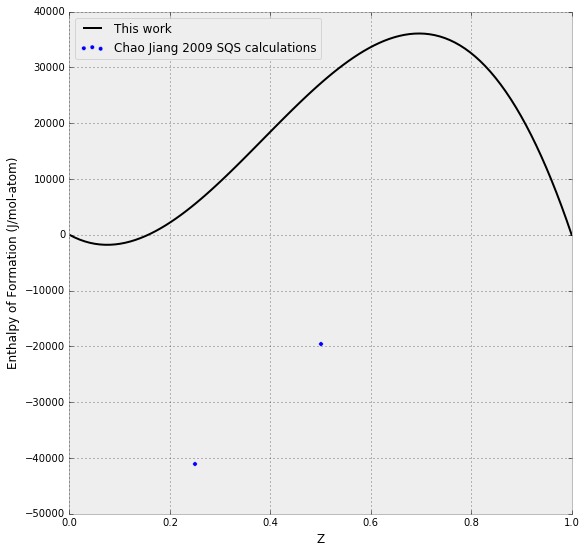

In [4]:
#datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(["AL", "NI", "VA"], "BCC_B2", ["AL", ["AL", "NI"], "VA"],
                            [0.5, 0.5, 1], datasets, return_dict[("AL", ("AL", "NI"), "VA")], plots=[('Z', 'HM_FORM')])